In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2 as cv2
import time as t

In [2]:
mpl.rc('axes', titlesize=14)  
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



# Routine to fix the image
def fix_image(image):  
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

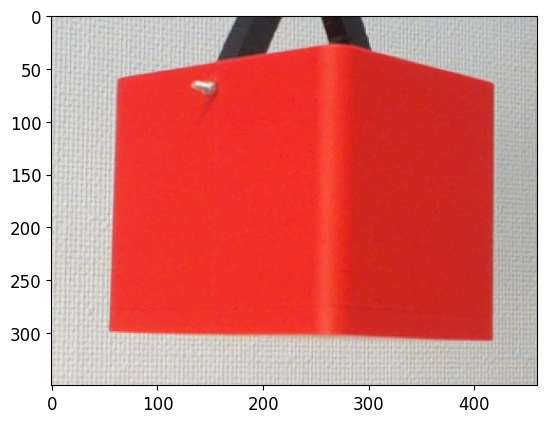

In [3]:
image = cv2.imread("1.jpg")

image = image[200:550, 440:900]

# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(fix_image(image))

# cv2.imwrite("short_image.jpg", image_short)


# Laplacian

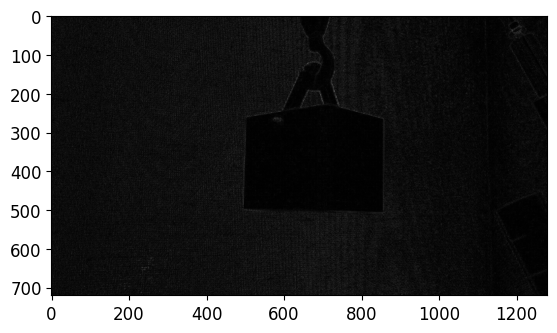

In [5]:
image_lap = cv2.Laplacian(image, cv2.CV_64F)
image_lap = np.uint8(np.absolute(image_lap))

plt.imshow(fix_image(image_lap))

error: OpenCV(4.10.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x46dff480::Set<1,-1,-1>,struct cv::impl::A0x46dff480::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


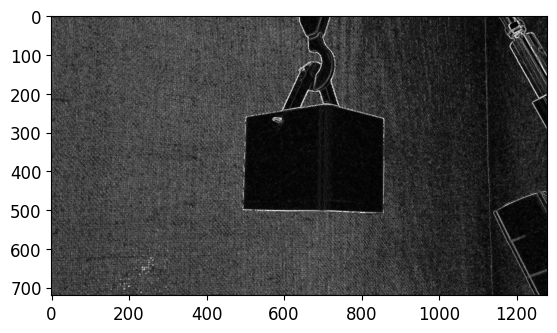

In [29]:
plt.imshow(fix_image(sobelCombined))

gray = cv2.cvtColor(sobelCombined, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 1), 0)


canny = cv2.Canny(blurred, 150, 400)
# contours, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# for c in contours:
#     print(c.shape[0][i] for i in range(0, c.shape[0]))
#     # Draw the contours on the output image
#     cv2.drawContours(canny, [c], -1, (0, 255, 0), 2)
plt.imshow(canny)
plt.show()

In [ ]:
cv2.findContours(sobelCombined.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

NameError: name 'sobelCombined' is not defined

In [ ]:
sobel_dup = image.copy()

# Harris Corner Detection

In [ ]:
# https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html
image = cv2.imread("1.jpg")
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
image[dst>0.01*dst.max()]=[0,255,0]

cv2.imshow("noe", image)

# Sub pixel accurarcy

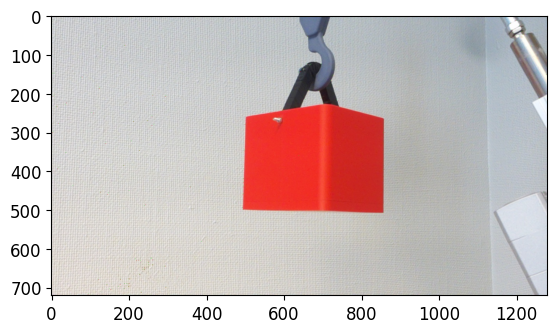

In [88]:
# https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html

image = cv2.imread("1.jpg")
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 1), 0)

# find Harris corners
gray = np.float32(blurred)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Now draw them
res = np.hstack((centroids,corners))
res = np.intp(res)
image[res[:,1],res[:,0]]=[0,0,255]
image[res[:,3],res[:,2]] = [0,255,0]

plt.imshow(fix_image(image))

# Canny edge 

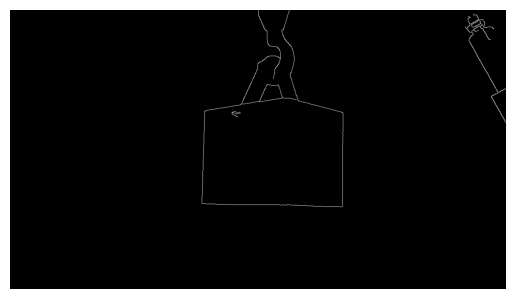

(49, 1, 2)


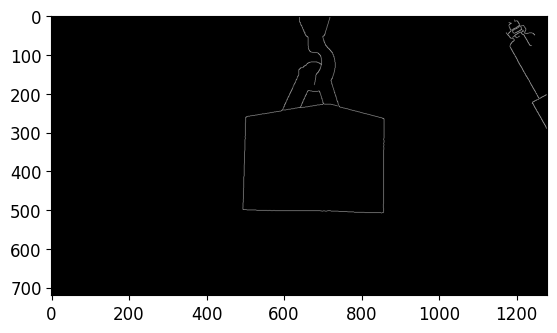

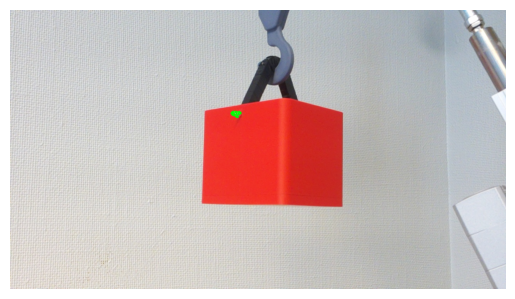

(211, 1, 2)


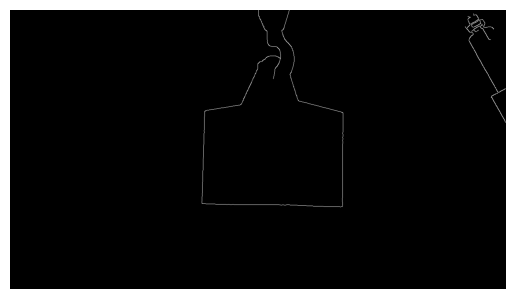

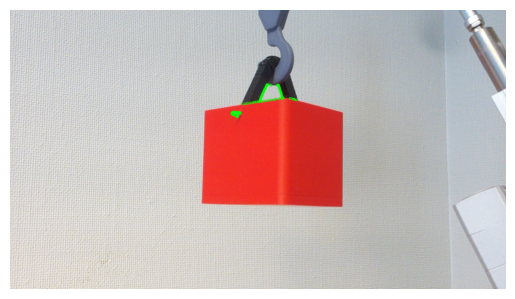

(15, 1, 2)


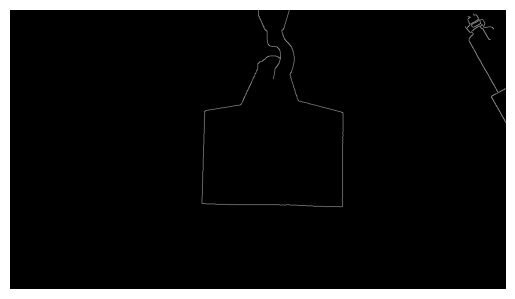

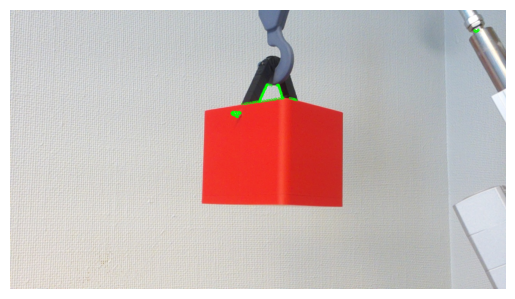

(408, 1, 2)


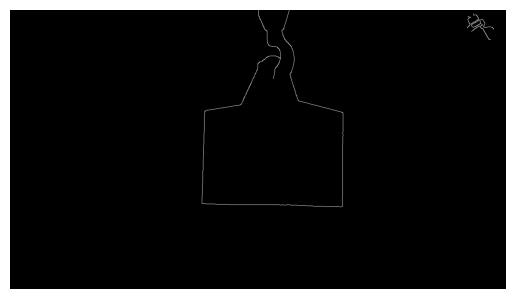

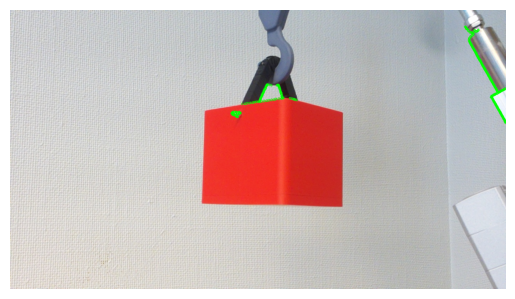

(100, 1, 2)


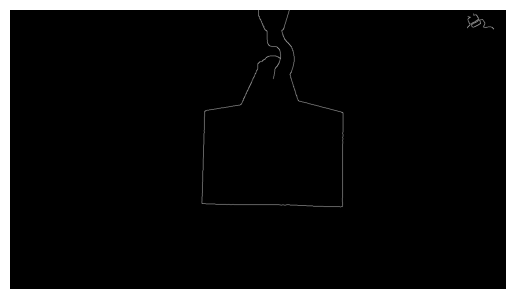

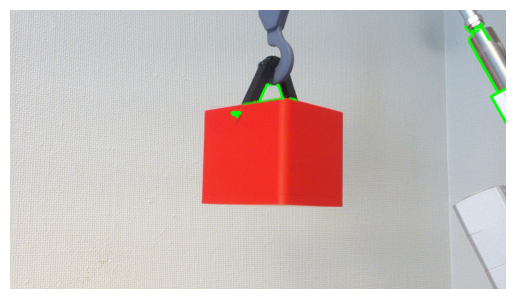

(62, 1, 2)


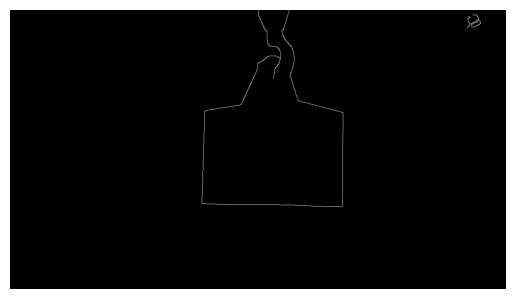

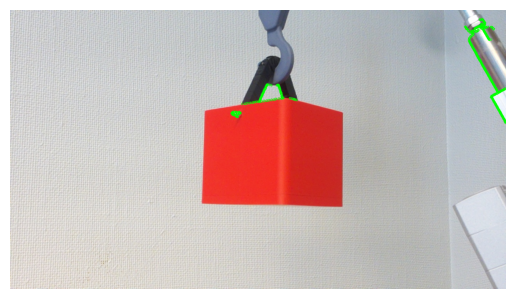

(151, 1, 2)


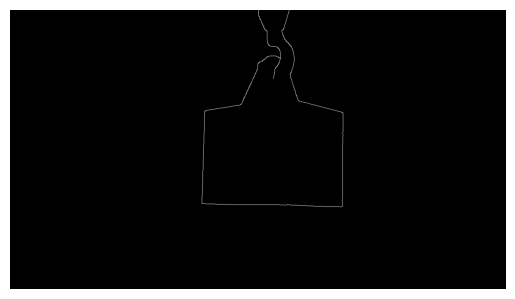

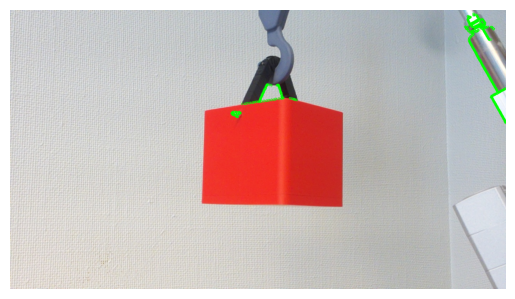

(439, 1, 2)


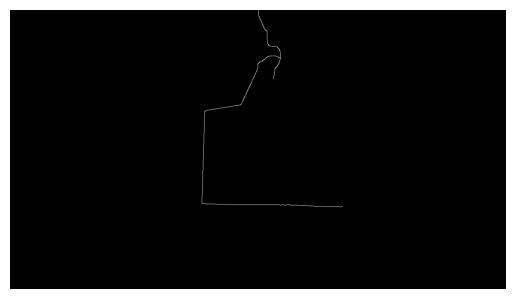

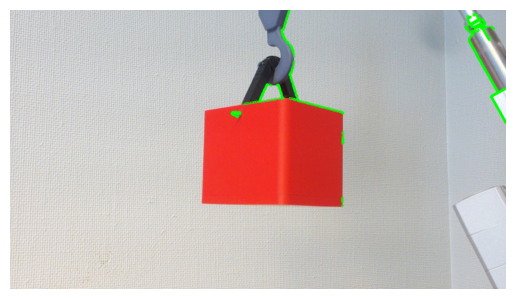

(581, 1, 2)


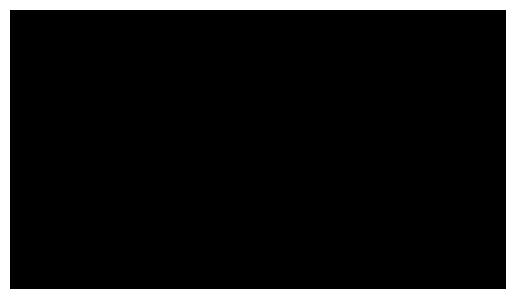

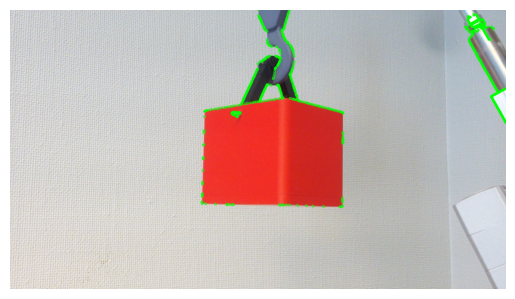

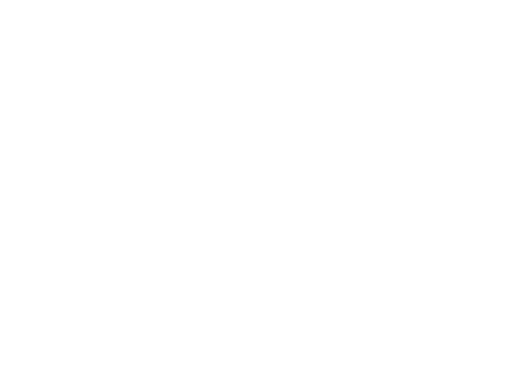

In [6]:
# From https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html and has been modified

image = cv2.imread("1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 1), 0)
# blurred = cv2.GaussianBlur(blurred, (5, 7), 0)
# plt.imshow(blurred)

canny = cv2.Canny(blurred, 100, 300)
contours, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

plt.imshow(fix_image(canny))
plt.axis('off')
plt.show()

for c in contours:
    if len(contours) > 10: # if there are more than 10 contours, dont run. 
        break
    print(c.shape) # Does not work
    cv2.drawContours(canny, [c], -1, (0, 255, 0), 2)
    for point in c:
        # print(point[0][0], point[0][1])
        cv2.circle(image, point[0], 3, (0, 255, 0), 1) 
    # Draw the contours on the output image
    plt.imshow(fix_image(canny))
    plt.show()
    plt.axis('off')
    plt.imshow(fix_image(image))
    plt.show()
    plt.axis('off')

# Somewhat okay

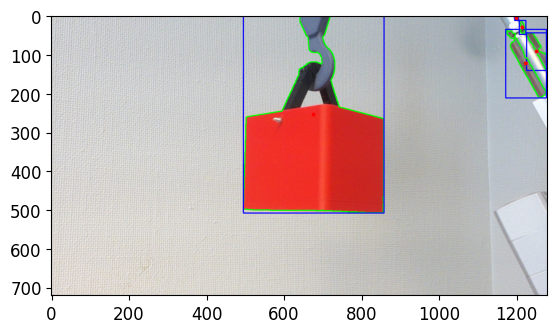

In [ ]:
# https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
image = cv2.imread("1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 1), 0)
edges = cv2.Canny(blurred, 100, 300)

_, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

contours, _ = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

output = image.copy()

for c in contours:
    # Draw the contours on the output image
    cv2.drawContours(output, [c], -1, (0, 255, 0), 2)
    # Get the bounding box for each contour
    x, y, w, h = cv2.boundingRect(c)
    # Draw the bounding box on the output image
    cv2.rectangle(output, (x, y), (x + w, y + h), (255, 0, 0), 2)
    # Get the center of the bounding box
    center_x = x + w // 2
    center_y = y + h // 2
    # Draw the center point on the output image
    cv2.circle(output, (center_x, center_y), 5, (0, 0, 255), -1)

plt.imshow(fix_image(output))


In [ ]:
(cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
coins = image.copy()

In [ ]:
cv2.drawContours(coins, cnts, -1, (255, 0, 0), 2)

array([[[225, 210, 207],
        [197, 185, 181],
        [200, 193, 190],
        ...,
        [194, 183, 175],
        [190, 179, 171],
        [189, 178, 170]],

       [[224, 209, 206],
        [198, 186, 182],
        [199, 192, 189],
        ...,
        [192, 181, 173],
        [188, 177, 169],
        [189, 178, 170]],

       [[224, 209, 207],
        [196, 183, 181],
        [190, 183, 180],
        ...,
        [192, 182, 172],
        [186, 176, 166],
        [184, 174, 164]],

       ...,

       [[220, 222, 232],
        [220, 222, 232],
        [219, 220, 230],
        ...,
        [223, 213, 206],
        [226, 214, 208],
        [228, 216, 210]],

       [[205, 206, 216],
        [211, 212, 222],
        [212, 211, 221],
        ...,
        [223, 212, 208],
        [225, 213, 207],
        [226, 214, 208]],

       [[207, 208, 218],
        [217, 218, 228],
        [215, 214, 224],
        ...,
        [225, 214, 210],
        [226, 214, 208],
        [226, 214, 208]]

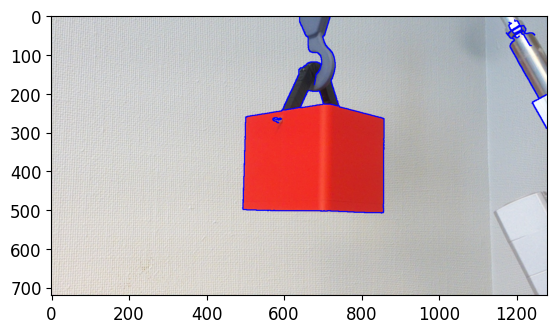

In [ ]:
plt.imshow(fix_image(coins))

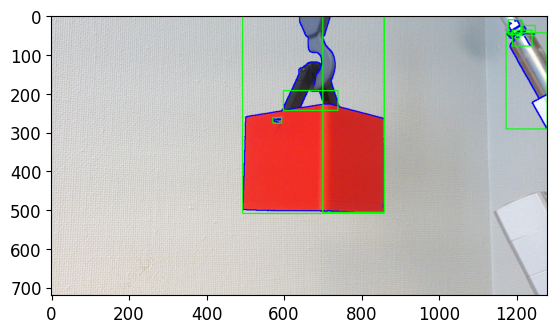

In [ ]:
for cnt in cnts:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(coins,(x,y),(x+w,y+h),(0,255,0),2)
        
    plt.imshow(fix_image(coins))

# Recepie for corner detection

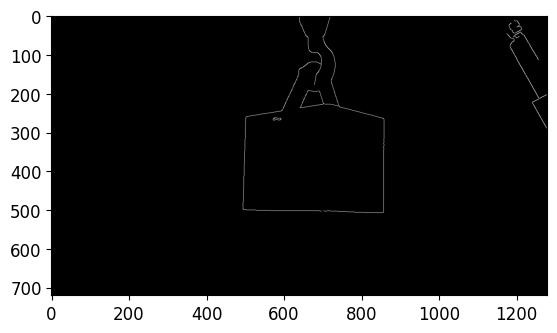

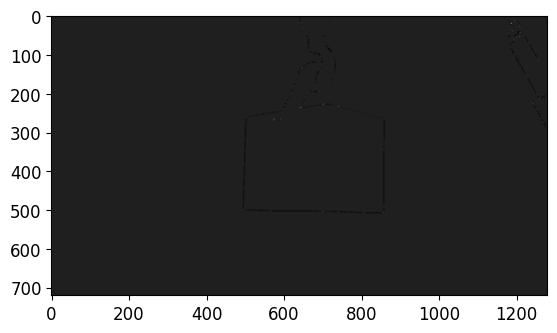

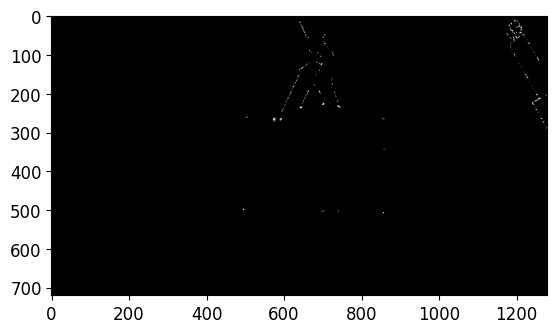

In [ ]:
# https://stackoverflow.com/questions/7263621/how-to-find-corners-on-a-image-using-opencv
image = cv2.imread("1.jpg")

# COnvert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# smooth the image
# gray = cv2.GaussianBlur(gray, (5, 1), 0)
bi = cv2.bilateralFilter(gray, 5, 75, 75)
# smooth = cv2.GaussianBlur(gray, (5, 7), 0)

canny = cv2.Canny(bi, 100, 300)
plt.imshow(fix_image(canny))
plt.show()


dst = cv2.cornerHarris(canny, 2, 3, 0.04)
plt.imshow(dst, cmap='gray')
plt.show()

mask = np.zeros_like(gray)

mask[dst > 0.01 * dst.max()] = 255
plt.imshow(fix_image(mask))
plt.show()

# Adaptive Threshold

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
# https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
 
img = cv.imread('1.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.medianBlur(img,5)
 
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,4)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
 
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

NameError: name 'cv2' is not defined